## **//life motto**

**if(sad()==true){**

> **sad().stop();**

> **beAwesome();**

**}**


# **Author: Jainil Sanghavi**
# **Organization: The Sparks Foundation**
# **Domain: Data Science & Business Analytics**
# **Task 2: Precdiction using Unsupervised ML**

## **Importing Required Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

## **Loading Dataset:**

In [9]:
iris = pd.read_csv("/content/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
iris.shape

(150, 6)

In [14]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.drop("Id", axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## **Data Visualization:**

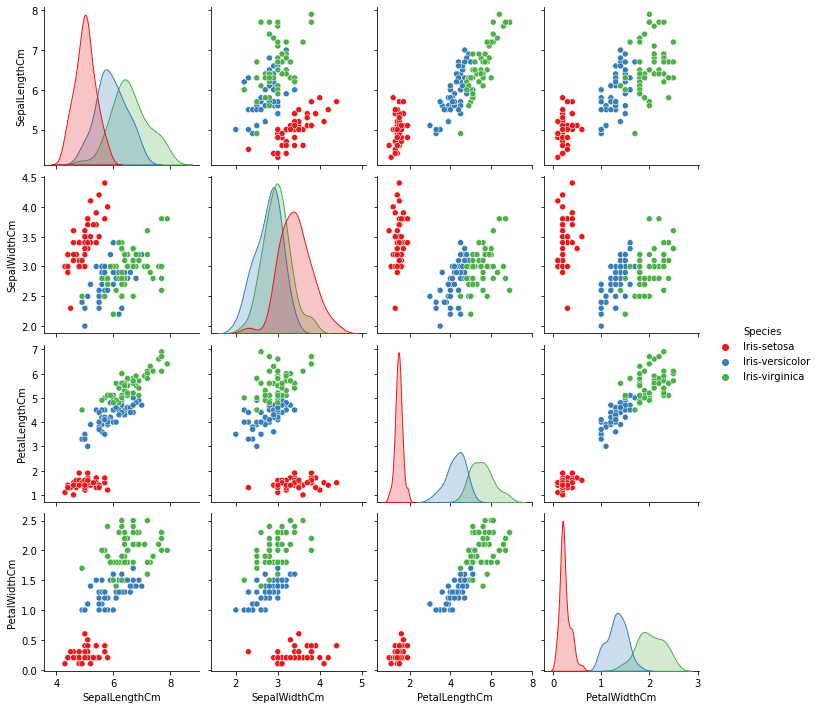

In [24]:
sns.pairplot(iris, hue="Species", palette="Set1")
plt.show()

## **Plotting HeatMap of Correlated Data:**

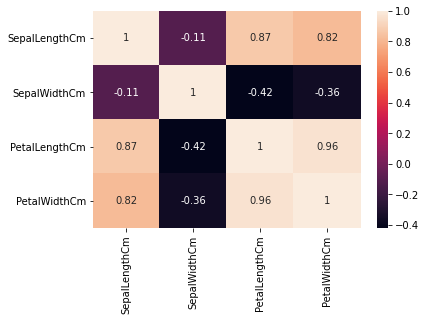

In [26]:
sns.heatmap(iris.corr(), annot=True)

## **Finding the optimum number of clusters using K-Means Clustering:**

In [27]:
x = iris.iloc[:, [0,1,2,3]].values

In [28]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
wcss = []

for i in range(1,11):
  Kmeans = KMeans (n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  Kmeans.fit(x)
  wcss.append(Kmeans.inertia_)

  print("K:", i, "WCSS:", Kmeans.inertia_)

K: 1 WCSS: 680.8244
K: 2 WCSS: 152.36870647733906
K: 3 WCSS: 78.94084142614602
K: 4 WCSS: 57.345409315718165
K: 5 WCSS: 46.53558205128205
K: 6 WCSS: 38.93873974358974
K: 7 WCSS: 34.19068792479662
K: 8 WCSS: 29.905374299825105
K: 9 WCSS: 27.927882157034972
K: 10 WCSS: 25.95549708624709


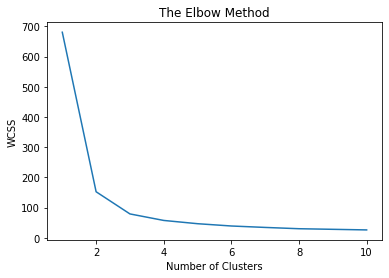

In [30]:
#Plotting the results onto a line graph
#allowing us to observe "The Elbow"

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### **The optimum value of K would be 3 !**

In [34]:
#Fitting K-Means to the Dataset

Kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_Kmeans = Kmeans.fit_predict(x)

y_Kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """


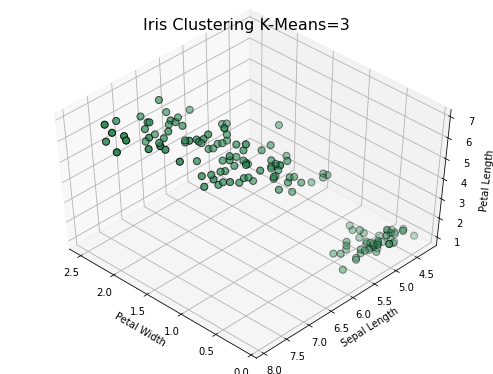

In [35]:
#Plotting into 3D Graph

fig = plt.figure(1, figsize=(7,5))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c="seagreen", edgecolor="K", s=50)
ax.set_xlabel("Petal Width")
ax.set_ylabel("Sepal Length")
ax.set_zlabel("Petal Length")
plt.title("Iris Clustering K-Means=3", fontsize=16)
plt.show()

## **Visualizing the Clusters:**

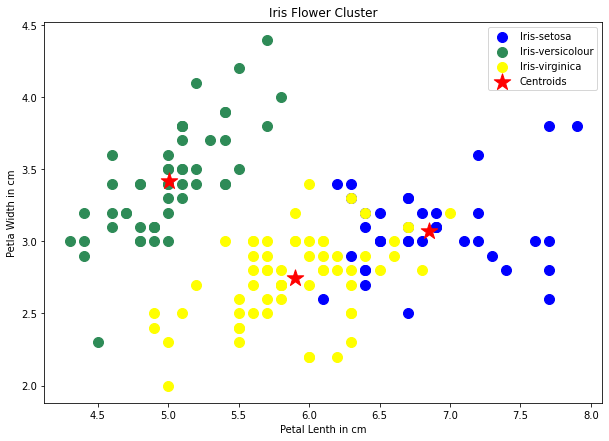

In [42]:
fig = plt.figure(figsize=(10,7))
plt.scatter(x[y_Kmeans == 0,0], x[y_Kmeans == 0,1], s=100, c="blue", label="Iris-setosa")
plt.scatter(x[y_Kmeans == 1,0], x[y_Kmeans == 1,1], s=100, c="seagreen", label="Iris-versicolour")
plt.scatter(x[y_Kmeans == 2,0], x[y_Kmeans == 2,1], s=100, c="yellow", label="Iris-virginica")
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=300, c="red", marker="*", label="Centroids")

plt.title("Iris Flower Cluster")
plt.xlabel("Petal Lenth in cm")
plt.ylabel("Petla Width in cm")
plt.legend()